In [10]:
from cv_pipeliner import YOLOv8_ModelSpec
from cv_pipeliner import ImageData
from cv_pipeliner import BatchGeneratorImageData
from cv_pipeliner import visualize_image_data

from pathlib import Path
from PIL import Image
import numpy as np

In [12]:
model_weights = '/home/jovyan/ceph-data/InTrans/models/yolov8m-detection/yolov8m.pt'
data_root = Path('/home/jovyan/ceph-data/InTrans/data/CLEAR_FULL_SEGMENTATION_07092022_SAM_FIXED/test')

DETECTION_MODEL_SPEC_v8 = YOLOv8_ModelSpec(
    model_path=model_weights
)

detection_inferencer_v8 = DETECTION_MODEL_SPEC_v8.load_detection_inferencer()

In [14]:
images_data = [
    ImageData.from_json(filepath) 
    for filepath in data_root.glob('*.json')
]

images_data_gen = BatchGeneratorImageData(data=images_data, batch_size=4)

In [15]:
pred_images_data_detection = detection_inferencer_v8.predict(
    images_data_gen=images_data,  # или images_data_gen
    score_threshold=0.5
)

100%|██████████| 1318/1318 [00:23<00:00, 57.02it/s]


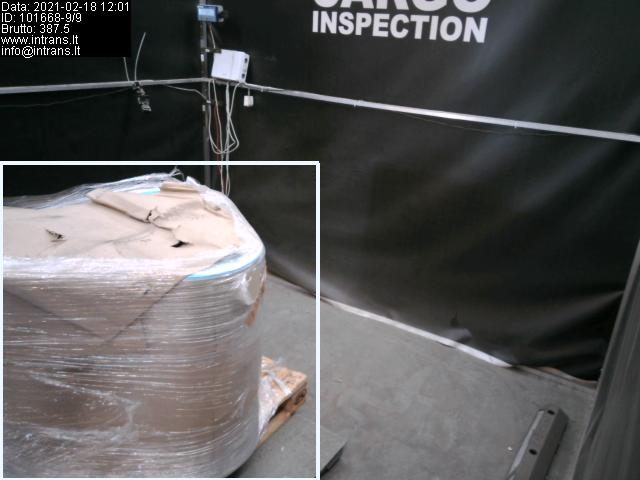

In [17]:
Image.fromarray(visualize_image_data(pred_images_data_detection[10]))